# Exemplo de Árvore
Aula 09/04/2022
Sépala

In [33]:
import pandas as pd

uri = 'https://raw.githubusercontent.com/alanammorais/ml_Uniesp/master/datasets/Aula%2002/iris/iris_data.csv'
iris_df = pd.read_csv(uri)

In [34]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [35]:
iris_df['class '].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class , dtype: int64

In [36]:
nome_colunas = {
    "sepal_length"  : "tamanho_sepala",
    "sepal_width"   : "largura_sepala",
    "petal_length"  : "tamanho_petala",
    "petal_width"   : "largura_petala",
    "class "         : "tipo"
}

iris_df = iris_df.rename(columns = nome_colunas)
iris_df.head()

,tamanho_sepala,largura_sepala,tamanho_petala,largura_petala,tipo
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [37]:
## Segmentação da amostra
# features = [    "tamanho_sepala", "largura_sepala",
#                 "tamanho_petala", "largura_petala"]

# X = iris_df[features]

X = iris_df.drop(columns=['tipo'], axis=1)

X.head(10)

,tamanho_sepala,largura_sepala,tamanho_petala,largura_petala
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [38]:
y = iris_df['tipo']
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: tipo, dtype: object

In [39]:
from sklearn.model_selection import train_test_split

# Precisa receber X e Y
#stratify proporção igual de teste e treino
treino_x, teste_x, treino_y, teste_y = train_test_split(X, y, test_size = 0.30, stratify = y)

print(treino_x.shape)
print(teste_x.shape)

(105, 4)
(45, 4)


### Criar e treinar a arvore

In [40]:
from sklearn.tree import DecisionTreeClassifier

modelo = DecisionTreeClassifier(max_depth=4, criterion="entropy")
modelo.fit(treino_x, treino_y)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [41]:
# Predict (teste)

previsoes = modelo.predict(teste_x)
previsoes

array(['Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa'], dtype=object)

In [42]:
from sklearn.metrics import accuracy_score

print("A acurácia foi de %.2f%%" % (accuracy_score(teste_y, previsoes) * 100))

A acurácia foi de 91.11%


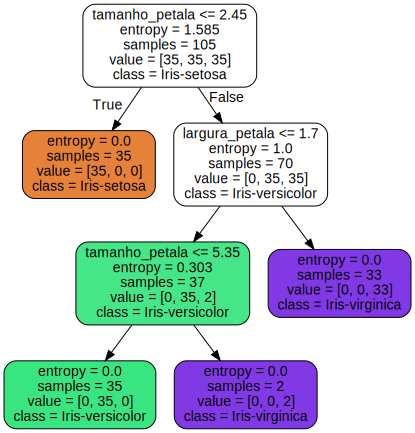

In [43]:
from numpy.ma.core import filled
from sklearn.tree import export_graphviz
import graphviz

features = X.columns
dot_data = export_graphviz(
    modelo, out_file=None, filled = True,
    rounded=True, feature_names= features,
    class_names = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]
)

grafico = graphviz.Source(dot_data)
grafico